# Detector de plagio
### (Intento con Hashes de 32 bits)

En este trabajo se busca realizar un detector de plagio de código utilizando técnicas del Deep Learning


**Autores:**

*   Michelle Aylin Calzada Montes
*   Manolo Ramírez Pintor
*   Eduardo Rodríguez Gill

### Cada vez que se quiera trabajar, se tiene que correr esta celda para tener acceso a los archivos

In [ ]:
# Accesar a Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ir al directorio de los archivos
%cd "/content/drive/Shareddrives/AI/Reto"
!ls

Mounted at /content/drive
/content/drive/Shareddrives/AI/Reto
Plagios_IA.zip	Reto.ipynb  version_2_tokenized.zip


In [ ]:
# Eliminar todo por si queremos reiniciar
!rm -rf "/content/Plagios IA"

# Copiar zip de las carpetas al almacenamiento de colab
!cp -r /content/drive/Shareddrives/AI/Reto/Plagios_IA.zip /content

# Nuevo - Copiar zip del codigo tokenizado al almacenamiento de colab
!cp -r /content/drive/Shareddrives/AI/Reto/version_2_tokenized.zip /content

In [ ]:
# Extraer zip de Plagios IA
%%capture
%cd /content
!unzip Plagios_IA.zip
!unzip version_2_tokenized.zip

In [ ]:
# Eliminar archivos distractores
!rm -rf sample_data
!rm Plagios_IA.zip

In [ ]:
# Instalar code_tokenize
%%capture
!pip install code-tokenize

# **Ya no correr las siguientes celdas**
## Revisando la info que contiene conplag en sus tablas



In [ ]:
# Ver info de conplag
import pandas as pd
df_conplag_labels = pd.read_csv("./Plagios IA/conplag/versions/labels.csv")
df_conplag_test = pd.read_csv("./Plagios IA/conplag/versions/test_pairs.csv")
df_conplag_train = pd.read_csv("./Plagios IA/conplag/versions/train_pairs.csv")

In [ ]:
# Head de labels conplag
df_conplag_labels.head(10)

,sub1,sub2,problem,verdict
0,0fd5b95a,6490bbe8,19,0
1,464a03b8,ff1fc018,20,0
2,3e6def38,548ffb07,14,1
3,0b91922c,71a4f6d2,6,0
4,9291ca83,d6fb3b9e,15,0
5,213340b3,35f0c004,4,0
6,7bc92b7f,9028caf7,19,0
7,6f393cfe,b185d034,15,0
8,1dab88fb,bac616ee,3,0
9,115c99cb,921b6e4a,14,1


In [ ]:
# Head de test conplag
df_conplag_test.head(10)

,464a03b8_ff1fc018
0,3e6def38_548ffb07
1,213340b3_35f0c004
2,7bc92b7f_9028caf7
3,6f393cfe_b185d034
4,1dab88fb_bac616ee
5,115c99cb_921b6e4a
6,5be7547e_cb032314
7,4e9c4bf9_7011024d
8,680ba922_6e207cbf
9,14b0fb8e_8ddb5587


In [ ]:
# Head de train conplag
df_conplag_train.head(10)

,2470b521_f6ca6fc8
0,a8e2cefc_ee270b2a
1,90f01508_e00b1794
2,16857116_f3d7ce08
3,51151974_c23278ec
4,00f79486_ce0b2178
5,976fe834_da54dec3
6,8d6f1bf5_e90a198b
7,9291ca83_d61f51c5
8,1386da0e_f87eb1b3
9,0fd5b95a_6490bbe8


In [ ]:
# Quitar archivos si no lo hicimos bien
!rm -rf "Plagios IA/conplag/versions/version_2_tokenized"

## Este bloque de código toma todos los archivos de conplag y los tokeniza
* Los tokens se convierten a valores numéricos únicos con una función hash de 32 bits

In [ ]:
# Tokenización de código:
import code_tokenize as ctok
import os
import hashlib
import time # import the time module

# Función hash
def hash_string(string):
    return zlib.adler32(string.encode('utf-8'))

# Asegura que el resultado del hash sea el mismo sin importar
# la máquina, el hardware, o la versión de Python en uso.
os.environ['PYTHONHASHSEED'] = '0' 

path = "./Plagios IA/conplag/versions/version_2"
new_path = "./Plagios IA/conplag/versions/version_2_tokenized"
folders = [x[0] for x in os.walk(path)]

for folder in folders:
    files = os.listdir(folder)
    new_folder = folder.replace(path, new_path) # replace the original path with the new one
    if not os.path.exists(new_folder): # check if the folder exists
        os.mkdir(new_folder) # create the folder only if it doesn't exist
        for file in files:
            time.sleep(1) # wait for one second
            file_path = os.path.join(folder, file)
            if os.path.isdir(file_path): # check if the file is actually a subfolder
                subfiles = os.listdir(file_path) # get the files in the subfolder
                new_subfolder = os.path.join(new_folder, file) # create a new subfolder with the same name
                os.mkdir(new_subfolder)
                for subfile in subfiles: # loop over the files in the subfolder
                    subfile_path = os.path.join(file_path, subfile)
                    with open(subfile_path, "r") as f:
                        content = f.read()
                    tokens = ctok.tokenize(content, lang="java")
                    tokens = [str(hash_string(str(i))) for i in tokens]
                    new_subfile_path = os.path.join(new_subfolder, subfile[:-4] + "tok")
                    with open(new_subfile_path, "w") as f:
                        f.write(" ".join(tokens))
            else: # if the file is not a subfolder, proceed as before
                with open(file_path, "r") as f:
                    content = f.read()
                tokens = ctok.tokenize(content, lang="java")
                tokens = [str(hash_string(str(i))) for i in tokens]
                new_file_path = os.path.join(new_folder, file[:-4] + "tok")
                with open(new_file_path, "w") as f:
                    f.write(" ".join(tokens))


## Estos (4) bloques de código almacena el código tokenizado a un zip y lo copia a Google Drive

In [ ]:
# Almacenamos el código tokenizado
%cd "/content/Plagios IA/conplag/versions/"

/content/Plagios IA/conplag/versions


In [ ]:
%%capture
!zip -r /content/version_2_tokenized.zip "version_2_tokenized"

In [ ]:
%cd /content

/content


In [ ]:
!cp version_2_tokenized.zip /content/drive/Shareddrives/AI/Reto # Copy to GDrive

### Método de verificación (por si acaso)
Valida que el número de carpetas y de archivos sea el mismo entre la carpeta original y la carpeta tokenizada.

In [ ]:
# Verificar que todo está correcto en carpetas y archivos
import os

path1 = "./Plagios IA/conplag/versions/version_2"
path2 = "./Plagios IA/conplag/versions/version_2_tokenized"

folder_count1 = 0
file_count1 = 0
folder_count2 = 0
file_count2 = 0

for folder, subfolders, files in os.walk(path1):
    folder_count1 += 1 # increment the folder count
    file_count1 += len(files) # add the number of files in the folder

for folder, subfolders, files in os.walk(path2):
    folder_count2 += 1 # increment the folder count
    file_count2 += len(files) # add the number of files in the folder

print(f"Number of folders in {path1}: {folder_count1}")
print(f"Number of files in {path1}: {file_count1}")
print(f"Number of folders in {path2}: {folder_count2}")
print(f"Number of files in {path2}: {file_count2}")

Number of folders in ./Plagios IA/conplag/versions/version_2: 912
Number of files in ./Plagios IA/conplag/versions/version_2: 1822
Number of folders in ./Plagios IA/conplag/versions/version_2_tokenized: 912
Number of files in ./Plagios IA/conplag/versions/version_2_tokenized: 1822


# **Continuar ejecución de celdas a partir de aquí:**
## Creación de un dataframe para iniciar el entrenamiento

In [ ]:
# Retomar los paths de trabajo 
import os
path = "./Plagios IA/conplag/versions/version_2"
new_path = "./version_2_tokenized"

In [ ]:
import pandas as pd
# read the table
df_conplag_labels = pd.read_csv("./Plagios IA/conplag/versions/labels.csv")

# create a dictionary that maps each pair of files to their verdict
verdict_dict = {}
for index, row in df_conplag_labels.iterrows():
    sub1 = row["sub1"]
    sub2 = row["sub2"]
    verdict = row["verdict"]
    verdict_dict[f"{sub1}_{sub2}"] = verdict

#print(verdict_dict)

In [ ]:
import numpy as np
# create empty lists to store the inputs and targets
inputs = []
targets = []
# loop over the subfolders in the tokenized folder
for subfolder in os.listdir(new_path):
    # get the verdict from the dictionary
    verdict = verdict_dict[subfolder]
    # load the two files and concatenate them
    file1 = np.loadtxt(os.path.join(new_path, subfolder, subfolder[:8] + ".tok"), dtype=int)
    file2 = np.loadtxt(os.path.join(new_path, subfolder, subfolder[9:] + ".tok"), dtype=int)
    input = np.concatenate((file1, file2))
    # append the input and target to the lists
    inputs.append(input)
    targets.append(verdict)
# convert the lists to arrays
inputs = np.array(inputs)
targets = np.array(targets)

# Crear dataframe
df_tokenizado = pd.DataFrame({"programs": inputs, "veredict": targets})
df_tokenizado

<ipython-input-8-dd5ef6057582>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  inputs = np.array(inputs)


,programs,veredict
0,"[151126684, 68944291, 3080239, 74580415, 30802...",1
1,"[151126684, 68944291, 3080239, 74580415, 30802...",1
2,"[151126684, 68944291, 3080239, 74580415, 30802...",0
3,"[151126684, 68944291, 3080239, 74580415, 30802...",0
4,"[151126684, 68944291, 3080239, 21168345, 30802...",1
...,...,...
906,"[151126684, 68944291, 3080239, 74580415, 30802...",0
907,"[151126684, 68944291, 3080239, 21168345, 30802...",0
908,"[151126684, 68944291, 3080239, 74580415, 30802...",0
909,"[151126684, 68944291, 3080239, 74580415, 30802...",0


## Preparación de datos

In [ ]:
# Hacer que los datos estén en nuevas variables
X = inputs
y = targets

In [ ]:
from keras.utils import pad_sequences
# pad the programs with zeros to make them have the same length
X = pad_sequences(X, padding='post')
# La shape de X (los programas en cuestión) deberían ser 911 y 12448
print("Tamaño de X:", X.shape)
# La shape de y sólo son los veredictos de si es plagio o no (911)
print("Tamaño de y:",y.shape)

Tamaño de X: (911, 12448)
Tamaño de y: (911,)


In [ ]:
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modelo LSTM



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense


model = Sequential()
model.add(LSTM(256, return_sequences=True, batch_input_shape=(None, 12448, 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(42, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs = 20,
                    verbose = 2,
                    shuffle = False)

Epoch 1/20
73/73 - 113s - loss: 0.6734 - acc: 0.7280 - 113s/epoch - 2s/step
Epoch 2/20
73/73 - 91s - loss: 0.5900 - acc: 0.7308 - 91s/epoch - 1s/step
Epoch 3/20
73/73 - 93s - loss: 0.5885 - acc: 0.7308 - 93s/epoch - 1s/step
Epoch 4/20
73/73 - 90s - loss: 0.5863 - acc: 0.7308 - 90s/epoch - 1s/step
Epoch 5/20
73/73 - 92s - loss: 0.5858 - acc: 0.7308 - 92s/epoch - 1s/step
Epoch 6/20
73/73 - 90s - loss: 0.5855 - acc: 0.7308 - 90s/epoch - 1s/step
Epoch 7/20
73/73 - 91s - loss: 0.5853 - acc: 0.7308 - 91s/epoch - 1s/step
Epoch 8/20
73/73 - 91s - loss: 0.5854 - acc: 0.7308 - 91s/epoch - 1s/step
Epoch 9/20
73/73 - 91s - loss: 0.5851 - acc: 0.7308 - 91s/epoch - 1s/step
Epoch 10/20
73/73 - 91s - loss: 0.5850 - acc: 0.7308 - 91s/epoch - 1s/step
Epoch 11/20
73/73 - 92s - loss: 0.5849 - acc: 0.7308 - 92s/epoch - 1s/step
Epoch 12/20
73/73 - 90s - loss: 0.5848 - acc: 0.7308 - 90s/epoch - 1s/step
Epoch 13/20
73/73 - 92s - loss: 0.5850 - acc: 0.7308 - 92s/epoch - 1s/step
Epoch 14/20
73/73 - 90s - loss: 

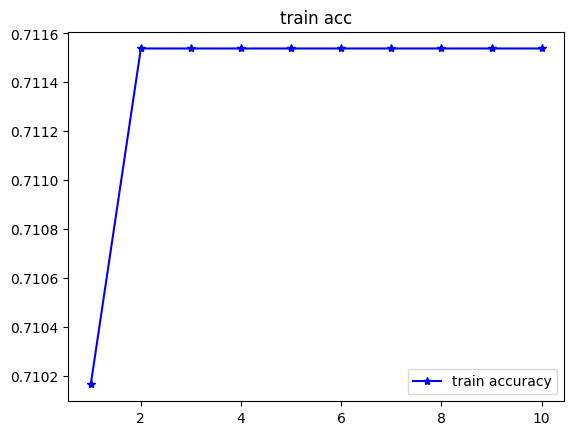

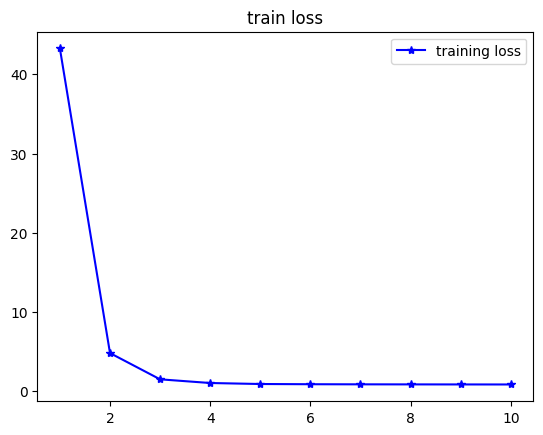

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b*-', label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b*-', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, batch_size=10, steps = 25)
print('\ntest acc :\n', test_acc)

 1/25 [>.............................] - ETA: 0s - loss: 0.2274 - acc: 0.0000e+00

25/25 [==============================] - 0s 4ms/step - loss: 0.2274 - acc: 0.0000e+00

test acc :
 0.0


In [ ]:
predictions = model.predict(X_test)
classes_x = predictions.T
classes_x = np.rint(classes_x)
classes_x

6/6 [==============================] - 4s 617ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

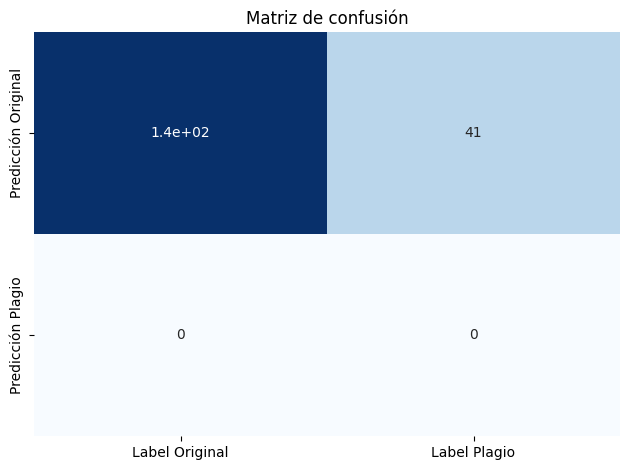

In [ ]:
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

mat = confusion_matrix(classes_x[0], y_test)

df = pd.DataFrame(mat, index=['Predicción Original', 'Predicción Plagio'], columns=['Label Original', 'Label Plagio'])

sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de confusión"), plt.tight_layout()
plt.show()

In [ ]:
X_train.shape

(728, 12448)

In [ ]:
from keras.api._v2.keras import callbacks
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf


early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',     # Métrica a monitorear (en este caso, pérdida de entrenamiento)
    patience=3,         # Número de epochs sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaurar los pesos del mejor modelo
)

model = Sequential()
model.add(Dense(256, activation='relu', batch_input_shape=(X.shape)))
model.add(Dropout(.5))
#model.add(LSTM(128, return_sequences=True, kernel_regularizer='l1'))
#model.add(LSTM(64, return_sequences=True, kernel_regularizer='l1'))
#model.add(LSTM(32, kernel_regularizer='l1'))
model.add(Dense(42, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


history = model.fit(X_train, y_train,
                    batch_size=20,
                    epochs = 60
                    )

Epoch 1/60
37/37 [==============================] - 2s 5ms/step - loss: 19777582.0000 - acc: 0.5893
Epoch 2/60
37/37 [==============================] - 0s 5ms/step - loss: 11663411.0000 - acc: 0.6085
Epoch 3/60
37/37 [==============================] - 0s 5ms/step - loss: 8952485.0000 - acc: 0.6154
Epoch 4/60
37/37 [==============================] - 0s 5ms/step - loss: 5926198.0000 - acc: 0.6250
Epoch 5/60
37/37 [==============================] - 0s 5ms/step - loss: 5983078.0000 - acc: 0.6085
Epoch 6/60
37/37 [==============================] - 0s 5ms/step - loss: 4454266.0000 - acc: 0.6264
Epoch 7/60
37/37 [==============================] - 0s 5ms/step - loss: 4385557.5000 - acc: 0.6071
Epoch 8/60
37/37 [==============================] - 0s 5ms/step - loss: 3388435.7500 - acc: 0.6319
Epoch 9/60
37/37 [==============================] - 0s 5ms/step - loss: 1801835.7500 - acc: 0.6497
Epoch 10/60
37/37 [==============================] - 0s 5ms/step - loss: 2793861.0000 - acc: 0.6813
Epoch 1

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=10, steps = 25)
print('\ntest acc :\n', test_acc)

 1/25 [>.............................] - ETA: 3s - loss: 0.6044 - acc: 0.7000

25/25 [==============================] - 0s 3ms/step - loss: 0.5433 - acc: 0.7760

test acc :
 0.7759562730789185
